In [1]:
import cv2
import glob
import json


def on_mouse(event,x,y,flags,param):
    global xMin,yMin,xMax,yMax
    if event == cv2.EVENT_LBUTTONDBLCLK:
        xMin,yMin = x,y
    if event == cv2.EVENT_RBUTTONDBLCLK:
        xMax,yMax = x,y
        
img_h=520 #vyska obrazku
img_w=650 #sirka obrazku

#!navod!
#1. objevi se obrazek
#2. je nutne ho zavrit a napsat kolik postav je na obrazku

#3. pravym dubleclickem mysi oznacit pravy dolni roh postavy
#4. levym dubleclickem mysi oznacit levy hodni roh postavy
#5. zavrit obrazek
#6 opakovat znova od bodu 3, dokud nebudou oznaceny vsechny postavy z obrazku


with open('annot_blank.json') as f:
    data=json.load(f)        

path = glob.glob('E:/dataset_2/Video/myData/Images/*.jpg') #cesta k obrazkum ktere budou anotovany
print('Pravy dubleclick pro xmax,ymax (pravy dolni roh postavy)')
print('Levy dubleclick pro xmin,ymin (levy horni roh postavy)')
print('_____')
for image_path in path:
    print('Novy obrazek')
    img = cv2.imread(image_path)
    image_length=len(data['images'])
    
    imgname='myImg_'+str(image_length)+'.jpg'
    
    cv2.imshow('obr',img)
    cv2.waitKey()
    
    number=int(input('Pocet postav na obrazku '))
    for k in range(number):
        print('Zbyva '+str(number-k))
        cv2.imshow('obr',img)

        cv2.setMouseCallback('obr',on_mouse)
        cv2.waitKey()
        width = xMax-xMin
        height = yMax-yMin

        annotat_length = len(data['annotations'])
        new_annot={'segmentation': [], 'area': '', 'iscrowd': 0, 'image_id': image_length, 'bbox': [xMin, yMin, width, height], 'category_id': 1, 'id': 0}
        data['annotations'].append(annotat_length)
        data['annotations'][annotat_length]=new_annot

    new_im={'file_name': imgname, 'coco_url': '', 'height': img_h , 'width': img_w, 'id': image_length}
    data['images'].append(image_length)
    data['images'][image_length]=new_im
    
    cv2.imwrite('Img2/'+imgname, img) #kam budou obrazky ukladany
    print('___________')
out_file = open('myTest.json', "w") #kam bude olozen json soubor s anotacema
json.dump(data,out_file)
out_file.close()
f.close()   
        

Pravy dubleclick pro xmax,ymax (pravy dolni roh postavy)
Levy dubleclick pro xmin,ymin (levy horni roh postavy)
_____
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva1
___________
Novy obrazek
Pocet postav na obrazku2
Zbyva2
Zbyva

In [3]:
from ssd_encoder_decoder.ssd_input_encoder import SSDInputEncoder
from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms
from matplotlib import pyplot as plt
import numpy as np


Caltech_images_dir_test= 'Img2/'

Caltech_annotations_test ='myTest.json'

img_height=520
img_width=650

classes = ['person']
dataset = DataGenerator()
dataset.parse_json(images_dirs=[Caltech_images_dir_test],
                         annotations_filenames=[Caltech_annotations_test],
                         ground_truth_available=True,
                         include_classes='all',
                         verbose = True,
                         ret=False)



convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)
batch_size=1
generator = dataset.generate(batch_size=1,
                             shuffle=False,
                             transformations=[convert_to_3_channels,
                                              resize],
                             returns={'processed_images',
                                      'filenames',
                                      'inverse_transform',
                                      'original_images',
                                      'original_labels'},
                             keep_images_without_gt=False)



Processing 'myTest.json': 100%|██████████████████████████████████████████████████| 100/100 [00:00<00:00, 100342.20it/s]


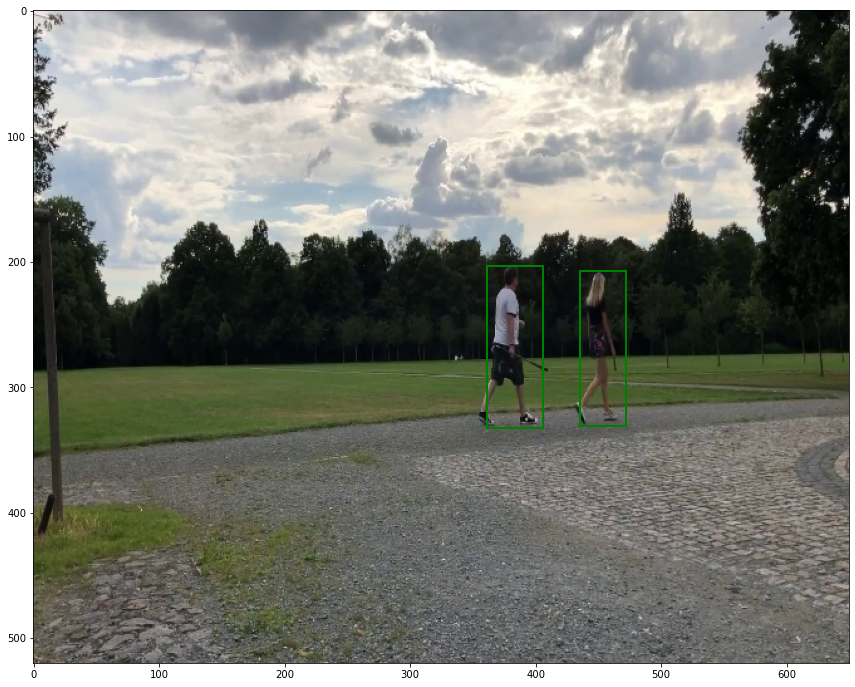

In [58]:
#Kontrola anotaci

batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(generator)

i = 0


colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

plt.figure(figsize=(20,12))
plt.imshow(batch_original_images[i])

current_axis = plt.gca()

for box in batch_original_labels[i]:
    xmin = box[1]
    
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  

